### Find intrinsic dimension from data

#### Read data generated by Matlab

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors, KDTree
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
xyz = pd.read_csv('xyz.csv', header=None)
xyz.head(2)

,0,1,2
0,3.000,0.0,0.00000
1,2.996,0.0,0.12685


In [3]:
def get_nearest_k_corrd(total_data: pd.DataFrame, query_point: pd.DataFrame, k: int):
    """
    find nearest k corrdinate of query_point from total_data
    total_data: 10000 by 3
    query_point: 1 by 3
    k: the number of nearest neighbors (contain itself)
    """
    kdt = KDTree(total_data, leaf_size=30, metric='euclidean')
    nn_inx = kdt.query(query_point, k=k, return_distance=False)
    # print(nn_inx[0])
    return total_data.iloc[nn_inx[0], :]

def get_s(cluster: pd.DataFrame):
    """
    Get the singular values from the points of a cluster
    """
    cluster = cluster - cluster.mean()  # normalize features (mean = 0)
    u, s, vh = svd(cluster, full_matrices=True)
    return s

#### k = 5

In [4]:
cluster2s = {}  # singular values of each cluster
xyz2 = xyz.copy()
while xyz2.shape[0] != 0:
    p = xyz2.sample(1, random_state=42)  # select one point randomly
    cluster_of_k = get_nearest_k_corrd(total_data=xyz2, query_point=p, k=5)
    s = get_s(cluster=cluster_of_k)
    # print(s)
    cluster2s[str(p.index.to_list()[0])] = s
    xyz2 = xyz2.loc[~xyz2.index.isin(cluster_of_k.index), :].copy()  # remove points in cluster_of_k

In [5]:
cluster2s_df = pd.DataFrame.from_dict(cluster2s, columns=['S1', 'S2', 'S3'], orient='index')
print('The shape of cluster2s_df: ', cluster2s_df.shape)
cluster2s_df.head(2)

The shape of cluster2s_df:  (2000, 3)


,S1,S2,S3
6252,0.090113,0.071999,0.003161
3125,0.179370,0.114588,0.001565


#### The percent variability explained by the third dimension

In [6]:
total_var = cluster2s_df.iloc[:, 0:3].sum(axis=1)
cluster2s_df['explained_var_S1 (%)'] = cluster2s_df['S1'] / total_var * 100
cluster2s_df['explained_var_S2 (%)'] = cluster2s_df['S2'] / total_var * 100
cluster2s_df['explained_var_S3 (%)'] = cluster2s_df['S3'] / total_var * 100

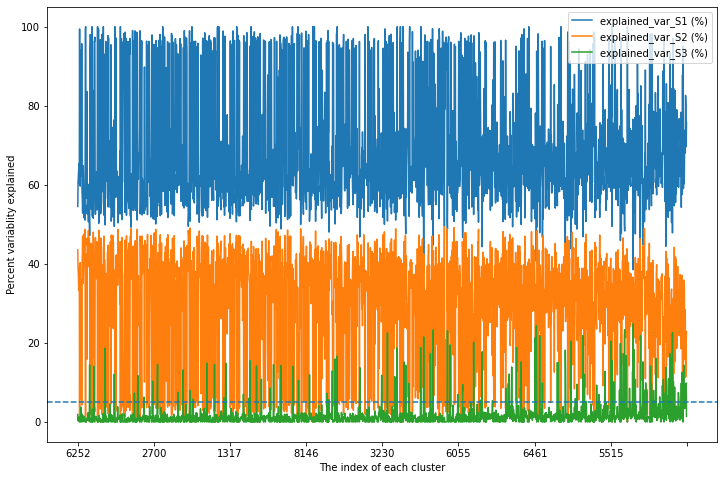

In [7]:
# plot singular values of each cluster
cluster2s_df.iloc[:, -3:].plot(figsize=(12, 8))
plt.axhline(5, linestyle='--')
plt.xlabel('The index of each cluster')
plt.ylabel('Percent variablity explained')
plt.savefig('percent_explained_var_each_cluster.png', dpi=200)

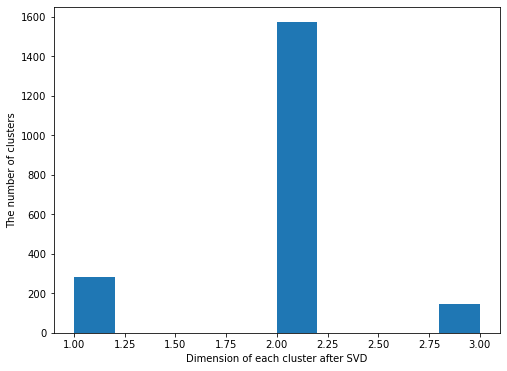

In [8]:
# set 5% as a threshold of percentage variability explained to get intrinsic dimension after SVD
# if a singular vlaues <= 0.01, it means that the data points in this cluster have  this dimension has a small contribution
dim_after_svd = np.sum(cluster2s_df.iloc[:, -3:] > 5, axis=1)
plt.figure(figsize=(8, 6))
plt.hist(dim_after_svd)
plt.xlabel('Dimension of each cluster after SVD')
plt.ylabel('The number of clusters')
plt.savefig('hist_of_dim_each_cluster.png', dpi=200)

In [9]:
dim_after_svd.mean()

1.932

In [10]:
print(sum(dim_after_svd == 0))
print(sum(dim_after_svd == 1))
print(sum(dim_after_svd == 2))
print(sum(dim_after_svd == 3))

0
282
1572
146


#### k = 20

In [16]:
cluster2s = {}  # singular values of each cluster
xyz2 = xyz.copy()
while xyz2.shape[0] != 0:
    p = xyz2.sample(1, random_state=42)  # select one point randomly
    cluster_of_k = get_nearest_k_corrd(total_data=xyz2, query_point=p, k=20)
    s = get_s(cluster=cluster_of_k)
    # print(s)
    cluster2s[str(p.index.to_list()[0])] = s
    xyz2 = xyz2.loc[~xyz2.index.isin(cluster_of_k.index), :].copy()  # remove points in cluster_of_k

In [17]:
cluster2s_df = pd.DataFrame.from_dict(cluster2s, columns=['S1', 'S2', 'S3'], orient='index')
print('The shape of cluster2s_df: ', cluster2s_df.shape)
cluster2s_df.head(2)

The shape of cluster2s_df:  (500, 3)


,S1,S2,S3
6252,0.340711,0.295346,0.026502
1253,0.515629,0.424295,0.029372


#### The percent variability explained by the third dimension

In [18]:
total_var = cluster2s_df.iloc[:, 0:3].sum(axis=1)
cluster2s_df['explained_var_S1 (%)'] = cluster2s_df['S1'] / total_var * 100
cluster2s_df['explained_var_S2 (%)'] = cluster2s_df['S2'] / total_var * 100
cluster2s_df['explained_var_S3 (%)'] = cluster2s_df['S3'] / total_var * 100

Text(0, 0.5, 'Percent variablity explained')

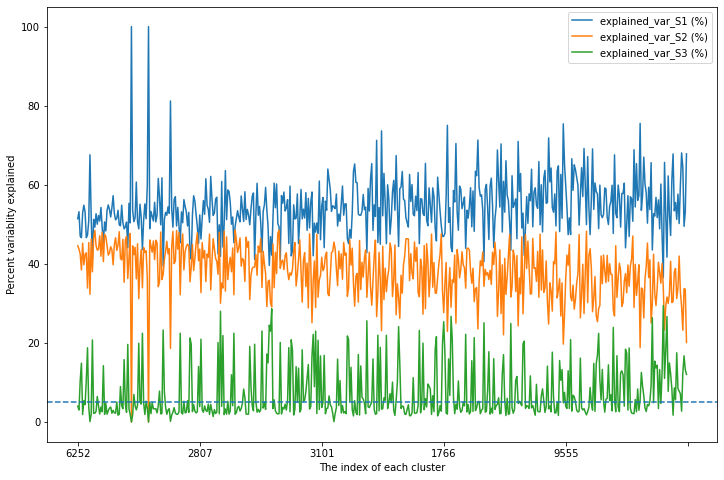

In [19]:
# plot singular values of each cluster
cluster2s_df.iloc[:, -3:].plot(figsize=(12, 8))
plt.axhline(5, linestyle='--')
plt.xlabel('The index of each cluster')
plt.ylabel('Percent variablity explained')
# plt.savefig('percent_explained_var_each_cluster.png', dpi=200)

Text(0, 0.5, 'The number of clusters')

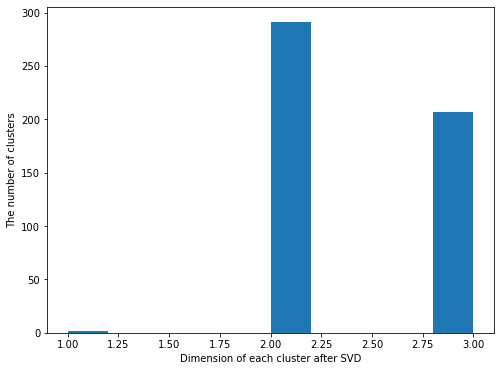

In [20]:
# set 5% as a threshold of percentage variability explained to get intrinsic dimension after SVD
# if a singular vlaues <= 0.01, it means that the data points in this cluster have  this dimension has a small contribution
dim_after_svd = np.sum(cluster2s_df.iloc[:, -3:] > 5, axis=1)
plt.figure(figsize=(8, 6))
plt.hist(dim_after_svd)
plt.xlabel('Dimension of each cluster after SVD')
plt.ylabel('The number of clusters')
# plt.savefig('hist_of_dim_each_cluster.png', dpi=200)

In [21]:
dim_after_svd.mean()

2.41

In [22]:
print(sum(dim_after_svd == 0))
print(sum(dim_after_svd == 1))
print(sum(dim_after_svd == 2))
print(sum(dim_after_svd == 3))

0
2
291
207
